# Single node modeling example
We set up a 2D isotropic acoustic modeling operator for a single shot with the source located in the center of the model, and receivers located in a fixed array across the top of the model. 

In [1]:
using PyPlot, WaveFD, JetPackWaveFD

In [2]:
v = read!("../02_marmousi_model_setup/marmousi_vp_20m_176x851.bin", Array{Float32}(undef, 176,851));
dz,dx = 20.0,20.0
nz,nx = size(v)
@show dz,dx
@show nz,nx;

(dz, dx) = (20.0, 20.0)
(nz, nx) = (176, 851)


In [3]:
F = JopNlProp2DAcoIsoDenQ_DEO2_FDTD(;
    b = ones(Float32,size(v)),
    nthreads = Sys.CPU_THREADS,
    isinterior = true,
    ntrec = 1601,
    dtrec = 0.004,
    dtmod = 0.002,
    dz = dz,
    dx = dx,
    wavelet = WaveletCausalRicker(f=5.0),
    sx = dx*(nx/2),
    sz = dz,
    rx = dx*[0:0.5:nx-1;],
    rz = 2*dz*ones(length(0:0.5:nx-1)))

"Jet nonlinear operator, (176, 851) → (1601, 1701)"

In [4]:
d = F*v;

┌ Info: nonlinear forward on cbox-wask-HC44rs, srcfieldfile=/tmp/field-9f5d1d84-ae72-4058-93ac-6bb88b54c6a7.bin
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:387
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step     1 of  3201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%) -- rms d,p; 0.0000e+00 0.0000e+00
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:703
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step   500 of  3201 ;  109.95 MCells/s (IO=42.27%, EX=34.58%) -- rms d,p; 1.2272e+00 1.1160e+00
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:703
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  1000 of  3201 ;  118.77 MCells/s (IO=40.88%, EX=33.03%) -- rms d,p; 1.3120e+00 9.1300e-01
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:703
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonl

In [5]:
# close the modeling operator, to remove seriliazation files
close(F)

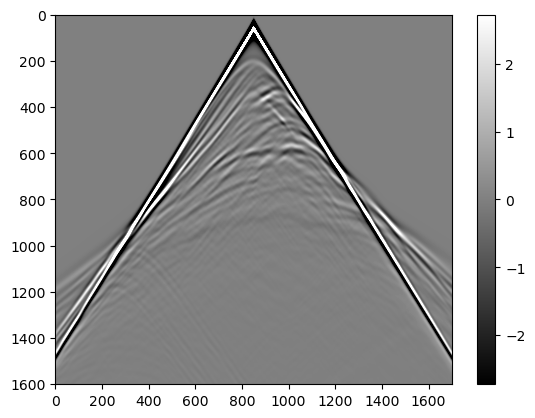

In [6]:
imshow(d,aspect="auto",cmap="gray")
dmax = maximum(abs, d)
clim(0.025 .* [-dmax,+dmax])
colorbar();